In [2]:
# Install & download NLTK resources if not already present
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('maxent_ne_chunker')
nltk.download('words')
nltk.download('vader_lexicon')
nltk.download('gutenberg')

# Libraries
import string
import matplotlib.pyplot as plt
from nltk.corpus import stopwords, gutenberg
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.probability import FreqDist
from nltk import pos_tag, ne_chunk
from nltk.sentiment import SentimentIntensityAnalyzer
from collections import Counter


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\mahes\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-

In [3]:
text = gutenberg.raw("shakespeare-hamlet.txt")
print(text[:500])

[The Tragedie of Hamlet by William Shakespeare 1599]


Actus Primus. Scoena Prima.

Enter Barnardo and Francisco two Centinels.

  Barnardo. Who's there?
  Fran. Nay answer me: Stand & vnfold
your selfe

   Bar. Long liue the King

   Fran. Barnardo?
  Bar. He

   Fran. You come most carefully vpon your houre

   Bar. 'Tis now strook twelue, get thee to bed Francisco

   Fran. For this releefe much thankes: 'Tis bitter cold,
And I am sicke at heart

   Barn. Haue you had quiet Guard?
  Fran. Not


In [8]:
# Sentence tokenization
sents = sent_tokenize(text)

# Word tokenization
words = word_tokenize(text)

# Lowercase + remove punctuation
words = [w.lower() for w in words if w.isalpha()]

# Remove stopwords
stop_words = set(stopwords.words("english"))
words = [w for w in words if w not in stop_words]

# Lemmatization
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(w) for w in words]

print("Sample words:", words[:30])
print("Total words after preprocessing:", len(words))


Sample words: ['tragedie', 'hamlet', 'william', 'shakespeare', 'actus', 'primus', 'scoena', 'prima', 'enter', 'barnardo', 'francisco', 'two', 'centinels', 'barnardo', 'fran', 'nay', 'answer', 'stand', 'vnfold', 'selfe', 'bar', 'long', 'liue', 'king', 'fran', 'barnardo', 'bar', 'fran', 'come', 'carefully']
Total words after preprocessing: 15411


Top 20 words: [('ham', 337), ('lord', 216), ('king', 180), ('haue', 175), ('come', 127), ('hamlet', 107), ('let', 107), ('shall', 107), ('thou', 104), ('good', 98), ('hor', 95), ('thy', 90), ('enter', 85), ('oh', 81), ('like', 80), ('well', 70), ('make', 70), ('father', 70), ('know', 69), ('would', 68)]


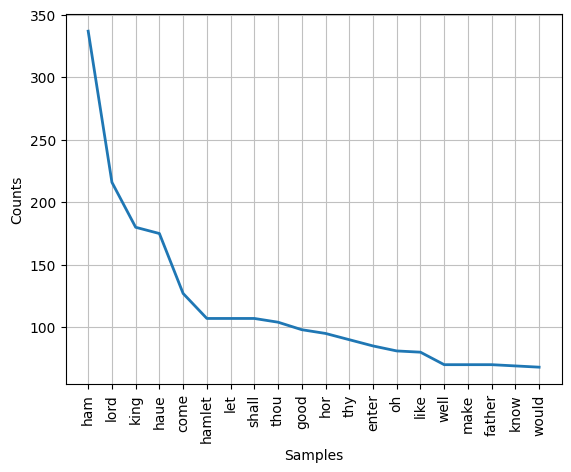

Top 10 nouns: [('ham', 263), ('lord', 183), ('haue', 110), ('hamlet', 102), ('hor', 82), ('thou', 76), ('let', 58), ('enter', 54), ('hath', 53), ('time', 51)]


In [5]:
# Frequency Distribution
fdist = FreqDist(words)

# Top 20 words
top20 = fdist.most_common(20)
print("Top 20 words:", top20)

# Plot bar chart
fdist.plot(20, cumulative=False)
plt.show()

# POS tagging (on filtered words)
pos_tags = pos_tag(words)

# Extract nouns
nouns = [word for word, tag in pos_tags if tag.startswith("NN")]
noun_freq = FreqDist(nouns)
print("Top 10 nouns:", noun_freq.most_common(10))


In [6]:
# Run NER on a subset (first 200 sentences to save time)
chunked = ne_chunk(pos_tag(word_tokenize(" ".join(sents[:200]))))

# Extract named entities
entities = []
for subtree in chunked:
    if hasattr(subtree, 'label'):
        entity = " ".join([leaf[0] for leaf in subtree.leaves()])
        entities.append(entity)

entity_counts = Counter(entities)
print("Top 10 named entities:", entity_counts.most_common(10))


Top 10 named entities: [('Mar', 9), ('Horatio', 8), ('Hamlet', 7), ('Barn', 6), ('Denmarke', 6), ('Barnardo', 5), ('Bar', 4), ('Marcellus', 4), ('Watch', 4), ('Norway', 4)]


Sentiment counts: Counter({'Neutral': 1432, 'Positive': 555, 'Negative': 368})


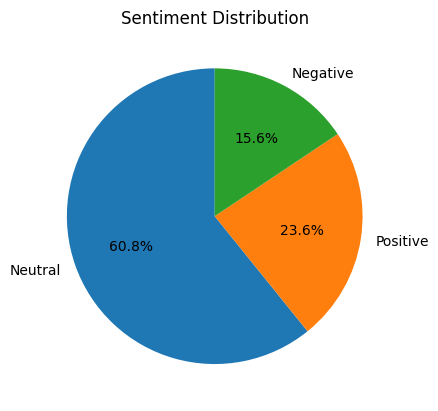


Examples:
Positive: ['You come most carefully vpon your houre\n\n   Bar.', 'Well, goodnight.']
Negative: ["For this releefe much thankes: 'Tis bitter cold,\nAnd I am sicke at heart\n\n   Barn.", "Horatio saies, 'tis but our Fantasie,\nAnd will not let beleefe take hold of him\nTouching this dreaded sight, twice seene of vs,\nTherefore I haue intreated him along\nWith vs, to watch the minutes of this Night,\nThat if againe this Apparition come,\nHe may approue our eyes, and speake to it\n\n   Hor."]
Neutral: ['[The Tragedie of Hamlet by William Shakespeare 1599]\n\n\nActus Primus.', 'Scoena Prima.']


In [7]:
# Initialize VADER
sia = SentimentIntensityAnalyzer()

labels = []
for sent in sents:
    score = sia.polarity_scores(sent)['compound']
    if score >= 0.05:
        labels.append("Positive")
    elif score <= -0.05:
        labels.append("Negative")
    else:
        labels.append("Neutral")

# Count results
sentiment_counts = Counter(labels)
print("Sentiment counts:", sentiment_counts)

# Pie chart
plt.pie(sentiment_counts.values(), labels=sentiment_counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title("Sentiment Distribution")
plt.show()

# Example sentences
print("\nExamples:")
print("Positive:", [s for s, l in zip(sents, labels) if l == "Positive"][:2])
print("Negative:", [s for s, l in zip(sents, labels) if l == "Negative"][:2])
print("Neutral:", [s for s, l in zip(sents, labels) if l == "Neutral"][:2])
